In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import glob
import os
# Be able to import from src folder
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))

import misc.notebookHelpers

%matplotlib inline
%config InlineBackend.figure_format = "retina"

plt.rcParams['figure.figsize'] = (10, 10)

/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation


In [4]:
data_path = os.path.join(PROJ_ROOT, 'data/processed/ds_labeled/*/*.h5')
h5files = glob.glob(data_path)

In [5]:
h5files

['/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113026/J24BF6GI.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113026/J24BF6GK.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113026/J24BF6GM.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113027/J24BF6OA.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113027/J24BF6OC.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113027/J24BF6OI.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113028/J24BF71G.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/_D113028/J24BF71K.h5',
 '/Users/torjushaukom/Documents/

In [6]:
data = h5py.File(h5files[4])

In [7]:
data['tissue/data'].shape

(317, 260, 98)

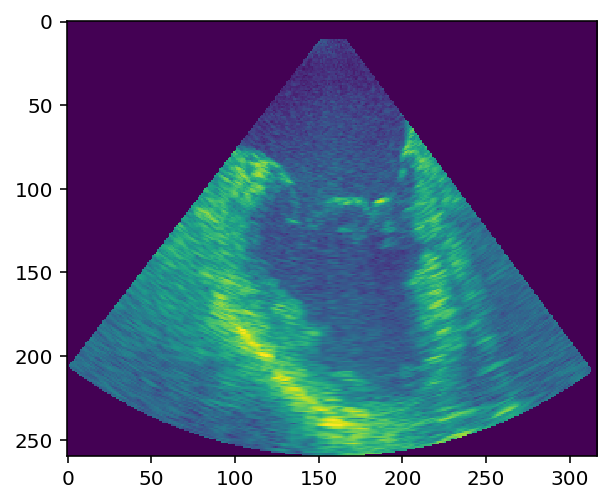

In [8]:
frame = np.transpose(data['tissue/data'], [2, 1, 0])[0, :, :]
plt.imshow(frame)

In [9]:
data.close()

In [15]:
"_".join(h5files[4].split('/')[-2:])[:-3] + '.mp4'

'_D113027_J24BF6OC.mp4'

In [16]:
mp4_path = os.path.join(PROJ_ROOT, 'data/raw/Ultrasound/mp4')
if not os.path.exists(mp4_path):
    os.mkdir(mp4_path)
for h5file in h5files:
    file_name = "_".join(h5file.split('/')[-2:])[:-3] + '.mp4'
    with h5py.File(h5file) as data:
        video, fps = misc.notebookHelpers.video_and_fps_from_h5py(data)
        anim = misc.notebookHelpers.ultraSoundAnimation(video, fps=fps)
        anim.save(os.path.join(mp4_path, file_name))